<a href="https://colab.research.google.com/github/Hemagithubnavya/Walmart-Weekly-Sales-Forecasting-using-Machine-Learning-/blob/main/Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Install and import kagglehub if not already installed
# !pip install kagglehub  # Uncomment this line if needed

import kagglehub
import pandas as pd
import os

# Step 2: Download the dataset
# "maxbaas/traincsv" is the KaggleHub dataset reference
path = kagglehub.dataset_download("maxbaas/traincsv")

# Step 3: Load CSV using the correct path
file_path = os.path.join(path, 'train.csv')  # Assuming 'train.csv' is the file name
df = pd.read_csv(file_path)

# Step 4: Preview the data
print("Dataset Shape:", df.shape)
print(df.head())


100%|██████████| 8.25M/8.25M [00:00<00:00, 93.8MB/s]

Extracting files...


Dataset Shape: (282451, 16)
   Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0     26    92  2011-08-26      87235.57      False        61.10       3.796   
1     34    22  2011-03-25       5945.97      False        53.11       3.480   
2     21    28  2010-12-03       1219.89      False        50.43       2.708   
3      8     9  2010-09-17      11972.71      False        75.32       2.582   
4     19    55  2012-05-18       8271.82      False        58.81       4.029   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  136.213613   
1        NaN        NaN        NaN        NaN        NaN  128.616064   
2        NaN        NaN        NaN        NaN        NaN  211.265543   
3        NaN        NaN        NaN        NaN        NaN  214.878556   
4   12613.98        NaN       11.5    1705.28    3600.79  138.106581   

   Unemployment Type    Size  
0         7.767    A  15251

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       181931
MarkDown2       208219
MarkDown3       190930
MarkDown4       192420
MarkDown5       181422
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64


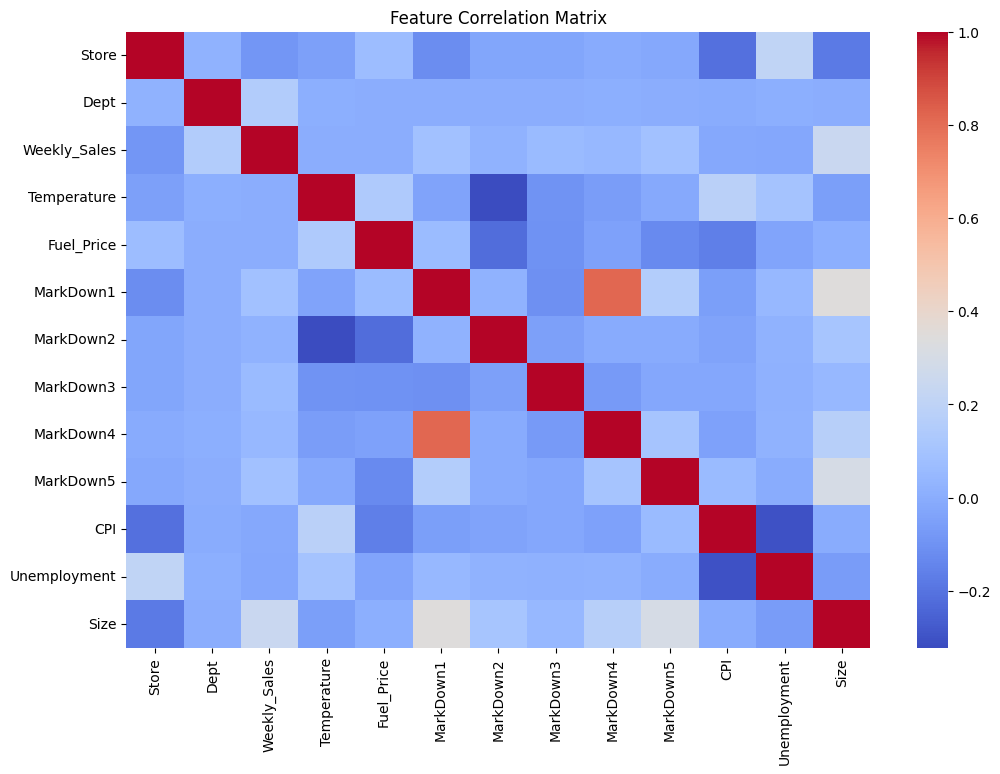

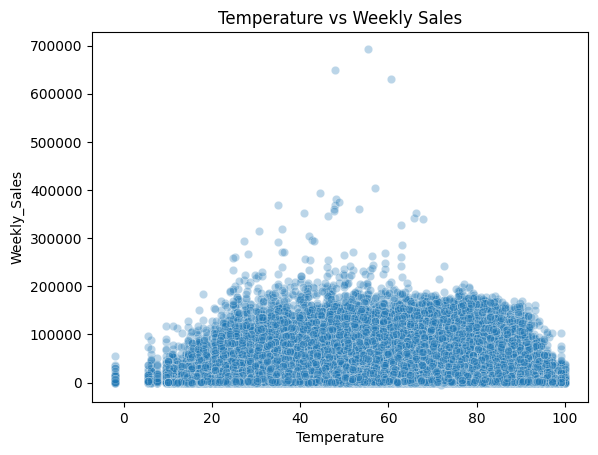

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
print(df.isnull().sum())

# Correlation heatmap (numeric only)
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Matrix")
plt.show()

# Sales vs Temperature
sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales', alpha=0.3)
plt.title('Temperature vs Weekly Sales')
plt.show()

In [ ]:
# Select useful features
features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']
X = df[features].fillna(0)
y = df['Weekly_Sales']

# Optional: scale features or use more sophisticated imputing if needed

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Linear Regression -> RMSE: 467182611.48, R2 Score: 0.062
Random Forest -> RMSE: 464906733.53, R2 Score: 0.066


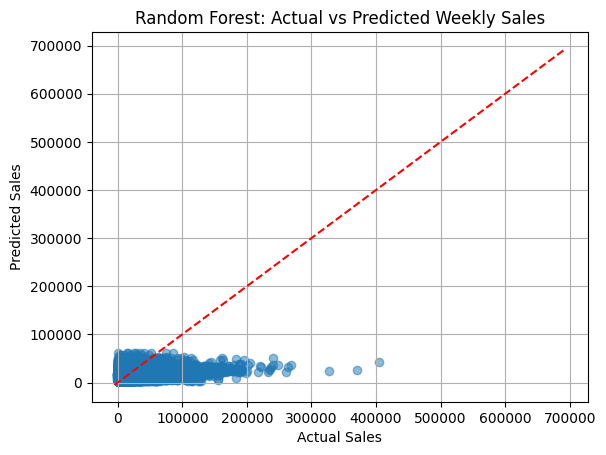

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score  # Import evaluation metrics

# Evaluate models
for name, model in [('Linear Regression', lr), ('Random Forest', rf)]:
    preds = model.predict(X_test)  # Make predictions on test data
    rmse = mean_squared_error(y_test, preds)  # Compute RMSE
    r2 = r2_score(y_test, preds)  # Compute R² Score
    print(f"{name} -> RMSE: {rmse:.2f}, R2 Score: {r2:.3f}")  # Output metrics

# Visualize Random Forest predictions
plt.scatter(y_test, rf.predict(X_test), alpha=0.5)  # Scatter plot of actual vs predicted
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Ideal prediction line
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Random Forest: Actual vs Predicted Weekly Sales")
plt.grid(True)
plt.show()